Using **FASTSRegressor** to make forecasts of Air Passengers.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from io import StringIO

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from IPython.display import HTML, display
pd.options.plotting.backend = "plotly"

import datetime
from time import time

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 6

import sys
# sys.path.append("C:\\PROGRAMMAZIONE\\Sviluppo\\AI\\MachineLearning\\Projects\\autolrn_sk21")
sys.path.append("C:\\PROGRAMMAZIONE\\Sviluppo\\AI\\MachineLearning\\timeseries\\projects\\fasts_demo")

from fasts import estimators as es
from fasts import valid as vd
from fasts import utils as us
from fasts.datasets import load_data

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
passengers = load_data("passengers.csv")
display(passengers)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

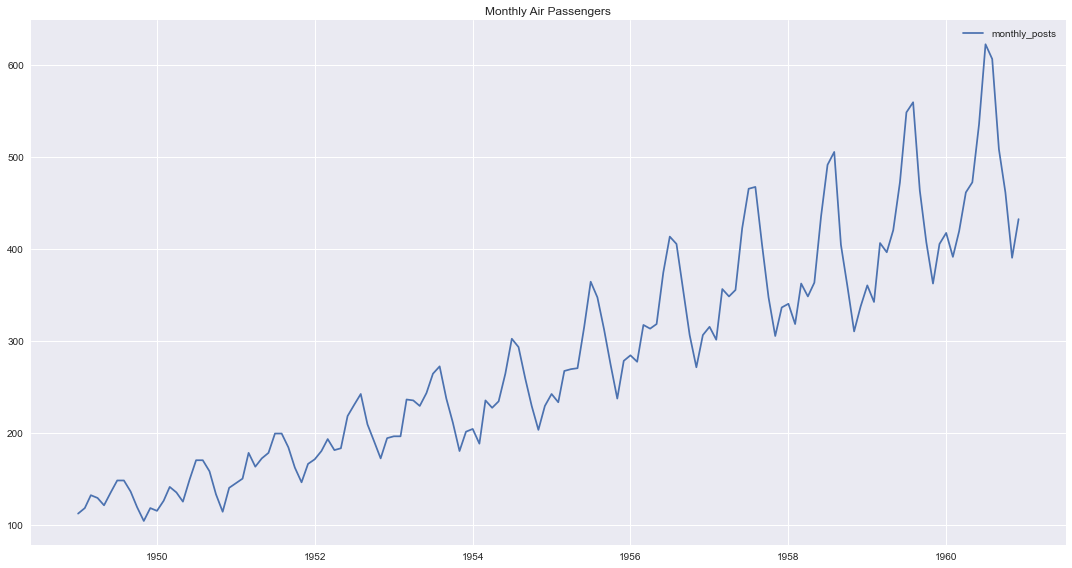

In [3]:
plt.figure(figsize=(15, 8))
plt.plot(passengers, label="monthly_posts")
plt.title("Monthly Air Passengers")
plt.legend()    
plt.tight_layout()

Likely, there's a weekly component.

In [4]:
n_jobs=-1
# 5, 10, 15, 25, 50, 75
n_iter=25
# forecasting horizon: 
# monthly: 12 (one year), 24 (two years)
fh=24
test_size=fh
n_lags=18

In [5]:
passengers.min()

104

## Power Transformations

### PowerTransform

In [6]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 10))
# method='box-cox'
# power = PowerTransformer(standardize=False, method='box-cox')
# pipeline = Pipeline(steps=[('s', scaler),('p', power)])
power = PowerTransformer(method='box-cox')

In [7]:
passengers_y_scale_bc = power.fit_transform(passengers.values.reshape(-1, 1)).ravel()
passengers_y_scale_bc[:10]

array([-1.79872086, -1.69309768, -1.46339556, -1.51080691, -1.64199225,
       -1.41689353, -1.22503242, -1.22503242, -1.40158845, -1.67594076])

In [8]:
len(passengers_y_scale_bc)

144

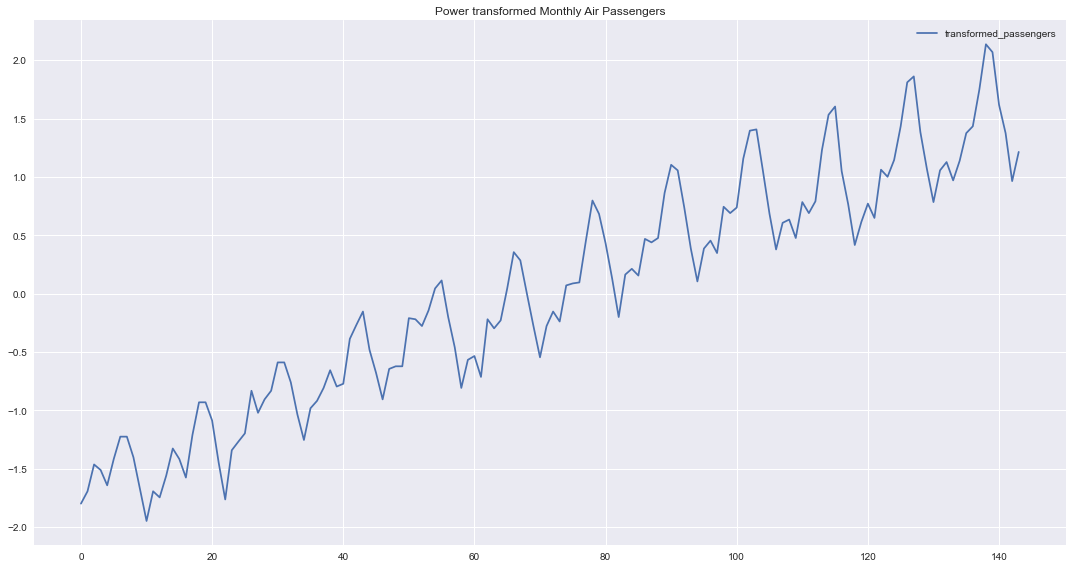

In [9]:
plt.figure(figsize=(15, 8))
plt.plot(passengers_y_scale_bc, label="transformed_passengers")
plt.title("Power transformed Monthly Air Passengers")
plt.legend()    
plt.tight_layout()

In [10]:
X, y = us.embed_to_X_y(
    pd.Series(passengers_y_scale_bc), 
    n_lags=n_lags, name='passengers')

In [11]:
y.min()

-1.7629885794234066

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42, shuffle=False)

In [13]:
display(X_train)

lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
0   -1.210877 -1.575505 -1.416894 -1.326471 -1.559167 -1.745322 -1.693098   
1   -0.930842 -1.210877 -1.575505 -1.416894 -1.326471 -1.559167 -1.745322   
2   -0.930842 -0.930842 -1.210877 -1.575505 -1.416894 -1.326471 -1.559167   
3   -1.086990 -0.930842 -0.930842 -1.210877 -1.575505 -1.416894 -1.326471   
4   -1.447796 -1.086990 -0.930842 -0.930842 -1.210877 -1.575505 -1.416894   
..        ...       ...       ...       ...       ...       ...       ...   
97   1.532152  1.230997  0.790956  0.690011  0.784338  0.476468  0.634649   
98   1.602844  1.532152  1.230997  0.790956  0.690011  0.784338  0.476468   
99   1.049777  1.602844  1.532152  1.230997  0.790956  0.690011  0.784338   
100  0.764390  1.049777  1.602844  1.532152  1.230997  0.790956  0.690011   
101  0.416630  0.764390  1.049777  1.602844  1.532152  1.230997  0.790956   

        lag_8     lag_9    lag_10    lag_11    lag_12    lag_13    lag_14  \
0   -1.947319 -1.675941 -1.401588 -1.225032 -1.225032 -1.416894 -1.641992   
1   -1.693098 -1.947319 -1.675941 -1.401588 -1.225032 -1.225032 -1.416894   
2   -1.745322 -1.693098 -1.947319 -1.675941 -1.401588 -1.225032 -1.225032   
3   -1.559167 -1.745322 -1.693098 -1.947319 -1.675941 -1.401588 -1.225032   
4   -1.326471 -1.559167 -1.745322 -1.693098 -1.947319 -1.675941 -1.401588   
..        ...       ...       ...       ...       ...       ...       ...   
97   0.606551  0.378559  0.683151  1.049777  1.406868  1.396182  1.156386   
98   0.634649  0.606551  0.378559  0.683151  1.049777  1.406868  1.396182   
99   0.476468  0.634649  0.606551  0.378559  0.683151  1.049777  1.406868   
100  0.784338  0.476468  0.634649  0.606551  0.378559  0.683151  1.049777   
101  0.690011  0.784338  0.476468  0.634649  0.606551  0.378559  0.683151   

       lag_15    lag_16    lag_17    lag_18  
0   -1.510807 -1.463396 -1.693098 -1.798721  
1   -1.641992 -1.510807 -1.463396 -1.693098  
2   -1.416894 -1.641992 -1.510807 -1.463396  
3   -1.225032 -1.416894 -1.641992 -1.510807  
4   -1.225032 -1.225032 -1.416894 -1.641992  
..        ...       ...       ...       ...  
97   0.737571  0.690011  0.744300  0.347718  
98   1.156386  0.737571  0.690011  0.744300  
99   1.396182  1.156386  0.737571  0.690011  
100  1.406868  1.396182  1.156386  0.737571  
101  1.049777  1.406868  1.396182  1.156386  

[102 rows x 18 columns]

In [14]:
y_train.min()

-1.7629885794234066

In [15]:
fasts = es.FASTSRegressor(
    # lasso_alpha=0.01,
    quantile_reg=True,
    )
fasts_params = vd.fasts_param_distros

In [16]:
fasts_params

{'lasso_alpha': <scipy.stats._distn_infrastructure.rv_frozen at 0x21da1fa6a08>,
 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x21da1faf188>,
 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen at 0x21da1faf0c8>,
 'subsample': <scipy.stats._distn_infrastructure.rv_frozen at 0x21da1fa6408>,
 'max_features': [None, 0.75, 0.5, 'log2'],
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen at 0x21da1fafdc8>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen at 0x21da1fafe88>}

In [17]:
display(X_train.head(3))

lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
0 -1.210877 -1.575505 -1.416894 -1.326471 -1.559167 -1.745322 -1.693098   
1 -0.930842 -1.210877 -1.575505 -1.416894 -1.326471 -1.559167 -1.745322   
2 -0.930842 -0.930842 -1.210877 -1.575505 -1.416894 -1.326471 -1.559167   

      lag_8     lag_9    lag_10    lag_11    lag_12    lag_13    lag_14  \
0 -1.947319 -1.675941 -1.401588 -1.225032 -1.225032 -1.416894 -1.641992   
1 -1.693098 -1.947319 -1.675941 -1.401588 -1.225032 -1.225032 -1.416894   
2 -1.745322 -1.693098 -1.947319 -1.675941 -1.401588 -1.225032 -1.225032   

     lag_15    lag_16    lag_17    lag_18  
0 -1.510807 -1.463396 -1.693098 -1.798721  
1 -1.641992 -1.510807 -1.463396 -1.693098  
2 -1.416894 -1.641992 -1.510807 -1.463396

In [18]:
# %time fasts.fit(X_train, y_train)

In [19]:
print("=== TS Randomized Search CV...")
print()

rscv = vd.TSRandomizedSearchCV(
    estimator=fasts, n_split=3, param_distro=fasts_params, fh=fh, 
    test_size=test_size, n_iter=n_iter, 
    n_jobs=n_jobs
)

failed = 0
try:
    t0 = time()
    rscv.fit(X_train, y_train)
    t1 = time()
except ValueError as ve:
    failed = 1
    print("ValueError:", ve)
    # adjust learning_rate distro for spanning little numbers?
    fasts_params["lasso_alpha"] = vd.loguniform(1e-3, 1e-2)
except Exception as e:
    failed = 1
    print("Mysterious Exception:", e)

=== TS Randomized Search CV...

ValueError: Found array with 0 feature(s).


In [20]:
if failed:
    try:
        t0 = time()
        rscv.fit(X_train, y_train)
        t1 = time()
    except ValueError as ve:
        print("ValueError:", ve)
    except Exception as e:
        print("Mysterious Exception:", e)

Best validation rmse score overall: 0.212 ± 0.043
Refitting best estimator...
X cols 18
X_sel_ cols 9
with quantile regression.
self.gbr_fitted_.n_features = 9


Full time of Search: 46.61 s

=== Compare best estimator to baselines on test data...

FASTSRegressor with quantile regression performed.

=== Trying to make forecasts w FASTSRegressor...



test windows:
[0.6136018573407688, 0.41662966539593155, 0.7643899504765508, 1.049776585666388, 1.602844109814903, 1.5321520795575625, 1.2309972137487843, 0.7909557840811434, 0.6900112765495423, 0.7843377969229831, 0.4764679557481491, 0.6346490880800354, 0.6065506356408661, 0.3785592144973318, 0.6831506709788487, 1.049776585666388, 1.406867981426004, 1.3961817562938215]
length of first Lasso test window: 18
[-0.052372090400771065, -0.14463219747930206, -0.04197319468614502, -0.2189243439864117, 0.038936232857006425, -0.00035375509455670695, -0.018755387952265945, -0.09389569786533514, -0.18383757327399808]
length of first GradBoost test window (residuals): 9

... gonna predict quantiles as well.

length of first vanilla GradBoost test window before quant. reg: 18
[-0.052372090400771065, -0.144632197

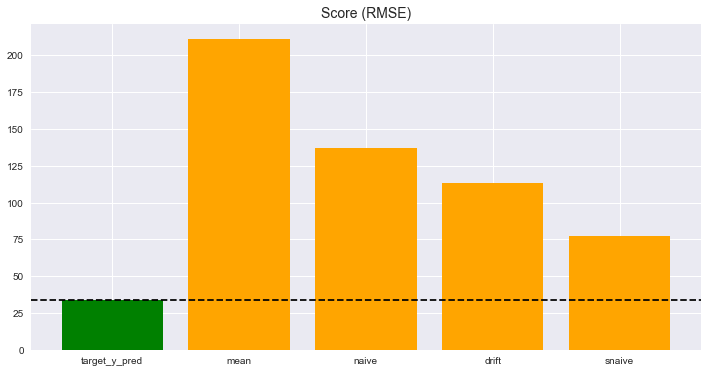

In [21]:
print(f"Full time of Search: {(t1 - t0):.2f} s")
print()

best_fasts = rscv.best_params_['best_estimator']

print("=== Compare best estimator to baselines on test data...")

scores, spreds, tgt_preds = best_fasts.compare_to_baselines(
    y_train, 
    y_test, 
    season=12,
    fh=fh, 
    bar_plot=True,
    bck_transformer=power
)

In [22]:
us.mean_absolute_percentage_error(
    passengers.values[-fh:],
    tgt_preds[tgt_preds > 0].fillna(0)["y_pred"])

6.387342019533042

In [23]:
tgt_preds

y_pred      low_80       up_80      low_95       up_95
0   356.393655  276.904941  454.550477  241.210901  515.465652
1   346.419546  276.366749  431.065946  244.340431  482.790675
2   379.809984  305.124362  469.537777  270.818607  524.142861
3   379.219562  295.236559  482.754295  257.472471  546.931385
4   395.364099  324.873019  478.488705  291.996646  528.402342
5   462.083065  364.074241  581.729511  319.644105  655.378261
6   522.170230  433.105891  626.386346  391.304468  688.615733
7   533.710857  442.008441  641.148435  399.012686  705.359570
8   445.481071  355.321879  554.441219  314.109268  621.031490
9   386.404001  311.067621  476.758707  276.414279  531.677869
10  341.272146  281.992024  410.855094  254.240395  452.498679
11  356.612117  282.437292  446.776921  248.693105  502.109545
12  378.059297  300.328560  472.312332  264.894286  530.051490
13  375.510401  311.867962  449.899346  281.971806  494.283668
14  402.027993  332.253351  483.917368  299.584871  532.920829
15  409.575595  339.285642  491.909781  306.323912  541.110379
16  428.302274  337.132551  539.688100  295.829855  608.290756
17  490.519200  400.493564  597.241894  358.687066  661.569820
18  551.983420  446.502319  677.992491  397.825322  754.365921
19  562.942124  469.120808  672.298320  424.947487  737.413459
20  484.085885  391.558744  594.624856  348.861228  661.624057
21  415.729098  330.998392  518.279684  292.314105  581.018780
22  370.568005  304.433176  448.569339  273.592937  495.412556
23  377.385454  310.967376  455.526324  279.932257  502.369255

In [24]:
spreds

mean  naive       drift  snaive
0   254.854218  337.0  336.488870   340.0
1   254.854218  337.0  339.335385   318.0
2   254.854218  337.0  340.766318   362.0
3   254.854218  337.0  343.643613   348.0
4   254.854218  337.0  345.090005   363.0
5   254.854218  337.0  347.998354   435.0
6   254.854218  337.0  350.927561   491.0
7   254.854218  337.0  352.400024   505.0
8   254.854218  337.0  355.360747   404.0
9   254.854218  337.0  356.849039   359.0
10  254.854218  337.0  359.841559   310.0
11  254.854218  337.0  361.345819   337.0
12  254.854218  337.0  364.370417   340.0
13  254.854218  337.0  365.890786   318.0
14  254.854218  337.0  368.947746   362.0
15  254.854218  337.0  370.484368   348.0
16  254.854218  337.0  373.573975   363.0
17  254.854218  337.0  375.126992   435.0
18  254.854218  337.0  378.249534   491.0
19  254.854218  337.0  379.819091   505.0
20  254.854218  337.0  382.974857   404.0
21  254.854218  337.0  384.561099   359.0
22  254.854218  337.0  387.750381   310.0
23  254.854218  337.0  390.962170   337.0

In [25]:
passengers[-fh:]

Month
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64


full_time_series_df
            orig_scale_posts   forecasts  y_test        mean  naive  \
Month                                                                 
1960-08-01               NaN  562.942124   606.0  254.854218  337.0   
1960-09-01               NaN  484.085885   508.0  254.854218  337.0   
1960-10-01               NaN  415.729098   461.0  254.854218  337.0   
1960-11-01               NaN  370.568005   390.0  254.854218  337.0   
1960-12-01               NaN  377.385454   432.0  254.854218  337.0   

                 drift  snaive      low_80       up_80      low_95       up_95  
Month                                                                           
1960-08-01  379.819091   505.0  469.120808  672.298320  424.947487  737.413459  
1960-09-01  382.974857   404.0  391.558744  594.624856  348.861228  661.624057  
1960-10-01  384.561099   359.0  330.998392  518.279684  292.314105  581.018780  
1960-11-01  387.750381   310.0  304.433176  448.569339  273.592937  495.4125

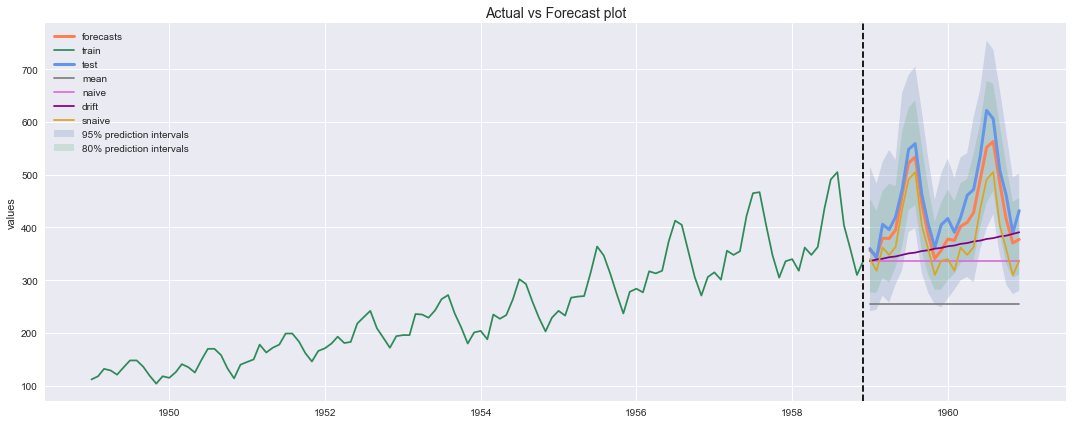

In [26]:
us.plot_forecasts(
    passengers[:-fh],
    tgt_preds[tgt_preds > 0].fillna(0),
    passengers.index, 
    y_test=passengers[-fh:],
    simple_preds=spreds,
    return_pred_int=True)

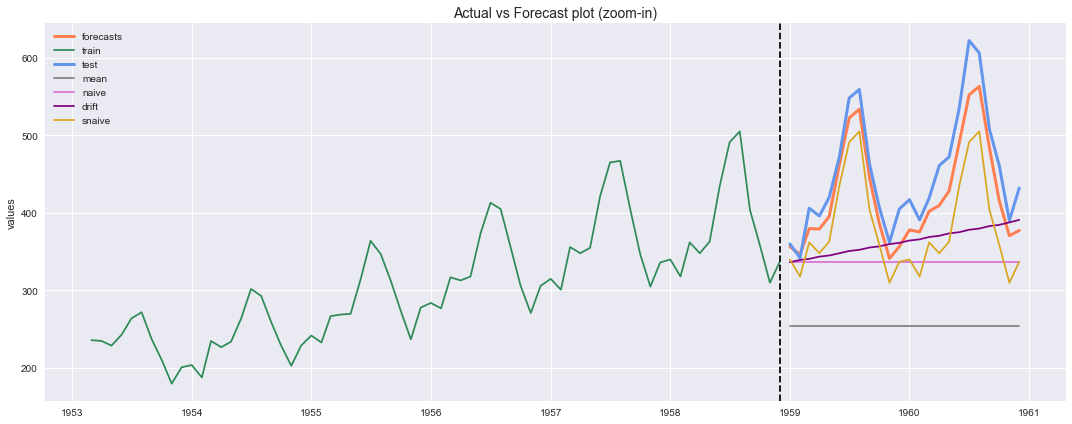

In [27]:
us.plot_forecasts(
    passengers[50:-fh],
    tgt_preds[tgt_preds > 0].fillna(0),
    passengers.index[50:], 
    y_test=passengers[-fh:],
    simple_preds=spreds,
    title='Actual vs Forecast plot (zoom-in)')

Model **underestimates** future nr. of passengers.

In [28]:
fasts.get_params()

{'criterion': 'friedman_mse',
 'lasso_alpha': 0.002854351186389649,
 'learning_rate': 0.28191887999735527,
 'loss': 'quantile',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 84,
 'quantile_reg': True,
 'subsample': 0.8759307963430452}

### Inference- forecasts

Train on full data set, predict the future w/o test comparison.

In [29]:
# once and for all
full_series_index = pd.date_range(start=passengers.index[0], periods=(len(passengers) + fh))
print(full_series_index)

DatetimeIndex(['1949-01-01', '1949-01-02', '1949-01-03', '1949-01-04',
               '1949-01-05', '1949-01-06', '1949-01-07', '1949-01-08',
               '1949-01-09', '1949-01-10',
               ...
               '1949-06-08', '1949-06-09', '1949-06-10', '1949-06-11',
               '1949-06-12', '1949-06-13', '1949-06-14', '1949-06-15',
               '1949-06-16', '1949-06-17'],
              dtype='datetime64[ns]', length=168, freq='D')


In [30]:
print("=== Fit best model upon full X, y (using best parameters from rdn search)...")

t0 = time()
best_fasts.fit(X, y)
t1 = time()

=== Fit best model upon full X, y (using best parameters from rdn search)...
X cols 18
X_sel_ cols 6
with quantile regression.
self.gbr_fitted_.n_features = 6


In [31]:
print(f"Time of fitting: {(t1 - t0):.2f} s")
print()
print("=== Compare best estimator baselines...")

_, spreds_full, tgt_fcs_full = best_fasts.compare_to_baselines(
    y, 
    season=12, 
    fh=fh,
    bck_transformer=power
)

Time of fitting: 1.06 s

=== Compare best estimator baselines...

FASTSRegressor with quantile regression performed.

=== Trying to make forecasts w FASTSRegressor...



test windows:
[1.213949513713541, 0.9640232430098433, 1.3746912991739657, 1.6177748034411679, 2.0684924107272877, 2.136082221759653, 1.74887379504282, 1.4334139384379636, 1.3746912991739657, 1.1388900802436488, 0.970234734902744, 1.1271668853033392, 1.055804440668208, 0.7843377969229831, 1.0678222068715435, 1.38545630035075, 1.8607560448714073, 1.8099952940341686]
length of first Lasso test window: 18
[0.02135814810956682, -0.11202678582593883, 0.0915313528832229, -0.03724368071674, -0.03031297706351621, 0.11574553803780319]
length of first GradBoost test window (residuals): 6

... gonna predict quantiles as well.

length of first vanilla GradBoost test window before quant. reg: 18
[0.02135814810956682, -0.11202678582593883, 0.0915313528832229, -0.03724368071674, -0.03031297706351621, 0.11574553803780319]
length of fir

=== Plot forecasts against simple preds...

full_time_series_df
            orig_scale_posts   forecasts        mean  naive       drift  \
1949-06-13               NaN  698.130676  284.719137  432.0  492.537714   
1949-06-14               NaN  612.321622  284.719137  432.0  496.475059   
1949-06-15               NaN  538.025294  284.719137  432.0  498.453766   
1949-06-16               NaN  479.434742  284.719137  432.0  502.431344   
1949-06-17               NaN  491.321953  284.719137  432.0  506.435932   

            snaive      low_80       up_80      low_95       up_95  
1949-06-13   606.0  581.233982  834.488827  526.230860  915.727652  
1949-06-14   508.0  521.010002  716.928302  477.413105  778.438214  
1949-06-15   461.0  446.698769  644.800832  403.807047  708.520698  
1949-06-16   390.0  410.638190  557.817074  377.645808  603.722812  
1949-06-17   432.0  409.309671  586.938431  370.704400  643.883010  


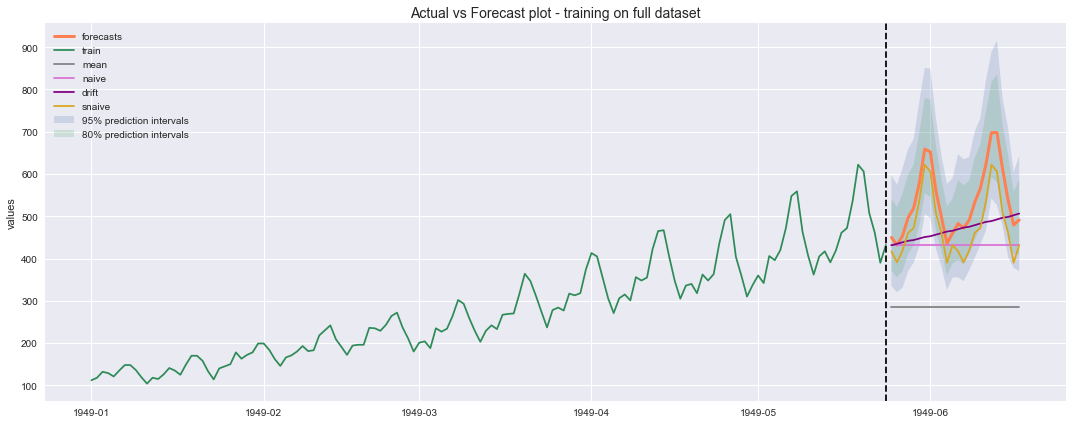

In [32]:
print("=== Plot forecasts against simple preds...")

us.plot_forecasts(
    passengers, 
    tgt_fcs_full[tgt_fcs_full > 0].fillna(0),
    full_series_index, 
    simple_preds=spreds_full,
    return_pred_int=True,
    title='Actual vs Forecast plot - training on full dataset'
)

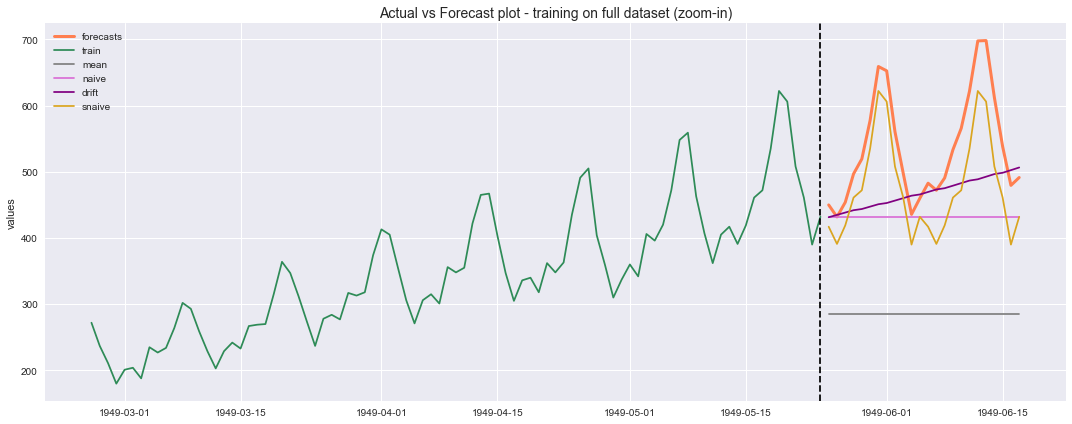

In [33]:
us.plot_forecasts(
    passengers[55:], 
    tgt_fcs_full[tgt_fcs_full > 0].fillna(0),
    full_series_index[55:], 
    simple_preds=spreds_full,
    title='Actual vs Forecast plot - training on full dataset (zoom-in)'
)

### log 2 exp

In [34]:
pass_y_log = np.log1p(passengers.values)
pass_y_log[:10]

array([4.72738782, 4.77912349, 4.89034913, 4.86753445, 4.80402104,
       4.91265489, 5.00394631, 5.00394631, 4.91998093, 4.78749174])

In [35]:
np.expm1(pass_y_log)

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [36]:
X_log, y_log = us.embed_to_X_y(
    pd.Series(pass_y_log), 
    n_lags=n_lags, name='log_passengers')

display(X_log)

lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
0    5.010635  4.836282  4.912655  4.955827  4.844187  4.753590  4.779123   
1    5.141664  5.010635  4.836282  4.912655  4.955827  4.844187  4.753590   
2    5.141664  5.141664  5.010635  4.836282  4.912655  4.955827  4.844187   
3    5.068904  5.141664  5.141664  5.010635  4.836282  4.912655  4.955827   
4    4.897840  5.068904  5.141664  5.141664  5.010635  4.836282  4.912655   
..        ...       ...       ...       ...       ...       ...       ...   
121  6.434547  6.284134  6.159095  6.135565  6.040255  5.971262  6.035481   
122  6.408529  6.434547  6.284134  6.159095  6.135565  6.040255  5.971262   
123  6.232448  6.408529  6.434547  6.284134  6.159095  6.135565  6.040255   
124  6.135565  6.232448  6.408529  6.434547  6.284134  6.159095  6.135565   
125  5.968708  6.135565  6.232448  6.408529  6.434547  6.284134  6.159095   

        lag_8     lag_9    lag_10    lag_11    lag_12    lag_13    lag_14  \
0    4.653960  4.787492  4.919981  5.003946  5.003946  4.912655  4.804021   
1    4.779123  4.653960  4.787492  4.919981  5.003946  5.003946  4.912655   
2    4.753590  4.779123  4.653960  4.787492  4.919981  5.003946  5.003946   
3    4.844187  4.753590  4.779123  4.653960  4.787492  4.919981  5.003946   
4    4.955827  4.844187  4.753590  4.779123  4.653960  4.787492  4.919981   
..        ...       ...       ...       ...       ...       ...       ...   
121  6.006353  5.894403  6.011267  6.139885  6.327937  6.308098  6.159095   
122  6.035481  6.006353  5.894403  6.011267  6.139885  6.327937  6.308098   
123  5.971262  6.035481  6.006353  5.894403  6.011267  6.139885  6.327937   
124  6.040255  5.971262  6.035481  6.006353  5.894403  6.011267  6.139885   
125  6.135565  6.040255  5.971262  6.035481  6.006353  5.894403  6.011267   

       lag_15    lag_16    lag_17    lag_18  
0    4.867534  4.890349  4.779123  4.727388  
1    4.804021  4.867534  4.890349  4.779123  
2    4.912655  4.804021  4.867534  4.890349  
3    5.003946  4.912655  4.804021  4.867534  
4    5.003946  5.003946  4.912655  4.804021  
..        ...       ...       ...       ...  
121  6.042633  5.983936  6.008813  5.837730  
122  6.159095  6.042633  5.983936  6.008813  
123  6.308098  6.159095  6.042633  5.983936  
124  6.327937  6.308098  6.159095  6.042633  
125  6.139885  6.327937  6.308098  6.159095  

[126 rows x 18 columns]

In [37]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y_log, test_size=test_size, random_state=42, shuffle=False)

In [38]:
fasts_log = es.FASTSRegressor(
    quantile_reg=True,
    )

In [39]:
print("=== TS Randomized Search CV...")
print()

rscv_log = vd.TSRandomizedSearchCV(
    estimator=fasts_log, n_split=3, param_distro=fasts_params, fh=fh, 
    test_size=test_size, n_iter=n_iter, 
    n_jobs=n_jobs
)

t0 = time()
rscv_log.fit(X_train_log, y_train_log)
t1 = time()

=== TS Randomized Search CV...

Best validation rmse score overall: 0.102 ± 0.043
Refitting best estimator...
X cols 18
X_sel_ cols 3
with quantile regression.
self.gbr_fitted_.n_features = 3


Full time of Search: 37.76 s

=== Compare best estimator to baselines on test data...

FASTSRegressor with quantile regression performed.

=== Trying to make forecasts w FASTSRegressor...



test windows:
[5.823045895483019, 5.739792912179234, 5.886104031450156, 6.003887067106539, 6.226536669287466, 6.198478716492308, 6.077642243349034, 5.8971538676367405, 5.855071922202427, 5.8944028342648505, 5.765191102784844, 5.831882477283517, 5.820082930352362, 5.723585101952381, 5.8522024797744745, 6.003887067106539, 6.148468295917647, 6.144185634125646]
length of first Lasso test window: 18
[-0.05589924484515585, -0.09378646477847319, -0.05552101702195067]
length of first GradBoost test window (residuals): 3

... gonna predict quantiles as well.

length of first vanilla GradBoost test window before quant. reg: 18
[-0.05589924484515585, -0.09378646477847319, -0.05552101702195067]
length of first GradBoost quantile test window (0.95): 3


You're here: 'lasso' loop...

You're here: 'grad_boost' lo

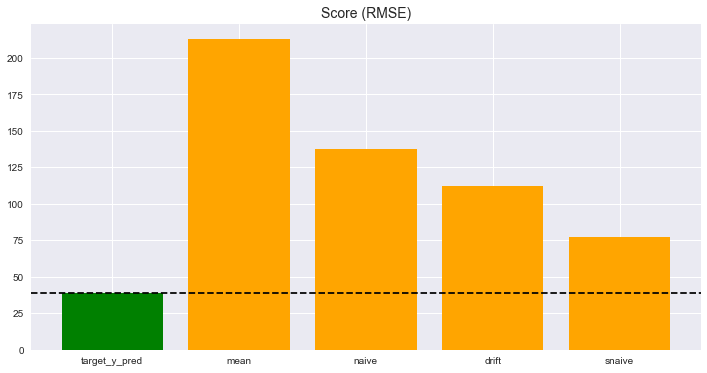

In [40]:
print(f"Full time of Search: {(t1 - t0):.2f} s")
print()

best_fasts_log = rscv_log.best_params_['best_estimator']

print("=== Compare best estimator to baselines on test data...")

scores_log, spreds_log, tgt_preds_log = best_fasts_log.compare_to_baselines(
    y_train_log, 
    y_test_log, 
    season=12,
    fh=fh, 
    bar_plot=True,
    bck_transformer=np.expm1
)

In [41]:
tgt_preds_log

y_pred      low_80       up_80      low_95        up_95
0   363.569681  230.642560  572.776478  181.046440   729.094211
1   352.599301  225.625867  550.713129  177.924972   697.798299
2   384.374512  240.226583  614.659819  187.078086   788.637525
3   379.618163  240.179122  599.674658  188.266011   764.431606
4   393.040750  250.563523  616.212348  197.203132   782.378704
5   451.972068  284.586931  717.463181  222.517418   916.976308
6   504.934507  323.575711  787.628713  255.390869   997.357416
7   520.472176  333.608777  811.690071  263.343564  1027.711374
8   443.931294  276.776540  711.673057  215.273447   914.340550
9   395.241957  252.032364  619.504373  198.387013   786.451931
10  350.123531  224.625411  545.426634  177.381496   690.146430
11  365.333763  229.616750  580.919680  179.350347   743.109604
12  388.018350  243.202931  618.711138  189.687364   792.630335
13  384.601738  248.134006  595.822180  196.538483   751.707516
14  408.328606  262.029122  636.001357  206.954141   804.706043
15  409.243344  263.758911  634.671149  208.802974   801.179293
16  421.848624  263.576801  674.799835  205.239404   865.958277
17  470.467340  298.551425  741.047723  234.410401   943.229533
18  519.148624  328.744041  819.498803  257.830680  1044.295676
19  536.122495  345.703859  831.123921  273.764271  1048.993046
20  478.927997  303.160411  756.267791  237.713067   963.885941
21  430.661498  271.816129  681.993523  212.799221   870.526326
22  388.595551  247.591637  609.578437  194.805571   774.180669
23  394.728838  255.209116  610.224596  202.372825   769.020842

In [42]:
us.mean_absolute_percentage_error(
    passengers.values[-fh:],
    tgt_preds_log[tgt_preds_log > 0].fillna(0)["y_pred"])

6.393974558960864

Better than model trained/evaluated on power transformed data.


full_time_series_df
            orig_scale_posts   forecasts  y_test        mean  naive  \
Month                                                                 
1960-08-01               NaN  536.122495   606.0  252.893418  337.0   
1960-09-01               NaN  478.927997   508.0  252.893418  337.0   
1960-10-01               NaN  430.661498   461.0  252.893418  337.0   
1960-11-01               NaN  388.595551   390.0  252.893418  337.0   
1960-12-01               NaN  394.728838   432.0  252.893418  337.0   

                 drift  snaive      low_80       up_80      low_95  \
Month                                                                
1960-08-01  382.753339   505.0  345.703859  831.123921  273.764271   
1960-09-01  386.610124   404.0  303.160411  756.267791  237.713067   
1960-10-01  386.610124   359.0  271.816129  681.993523  212.799221   
1960-11-01  390.505671   310.0  247.591637  609.578437  194.805571   
1960-12-01  394.440368   337.0  255.209116  610.224596  202.3

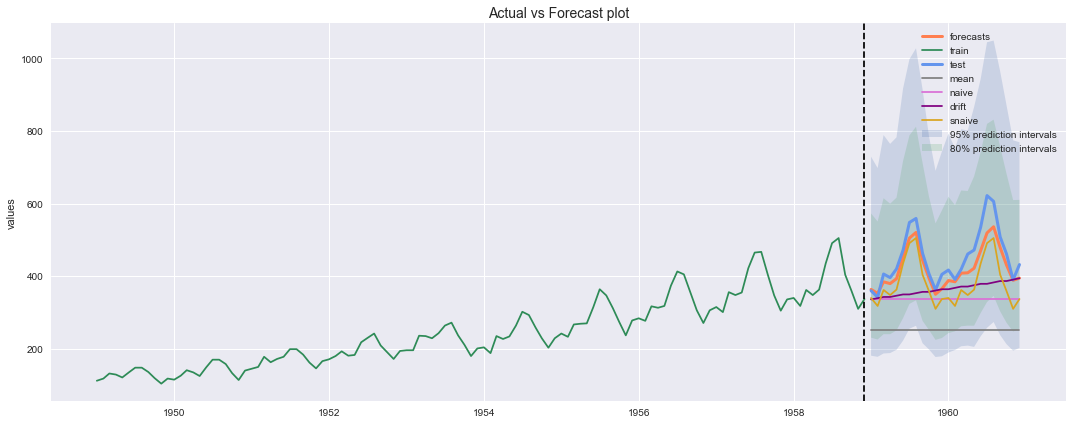

In [43]:
us.plot_forecasts(
    passengers[:-fh],
    tgt_preds_log[tgt_preds_log > 0].fillna(0),
    passengers.index, 
    y_test=passengers[-fh:],
    simple_preds=spreds_log,
    return_pred_int=True)

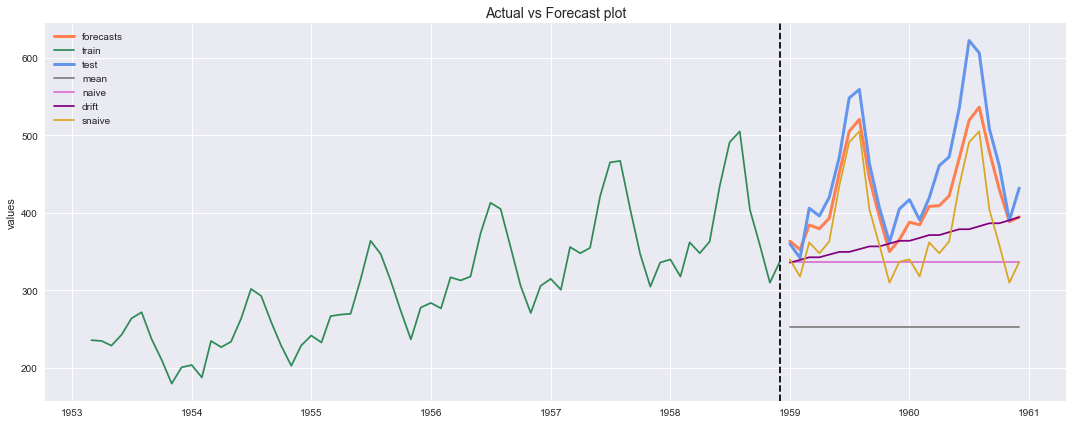

In [44]:
us.plot_forecasts(
    passengers[50:-fh],
    tgt_preds_log[tgt_preds_log > 0].fillna(0),
    passengers.index[50:], 
    y_test=passengers[-fh:],
    simple_preds=spreds_log)

Better than Box-Cox tranformation, **still underestimating** future passengers.

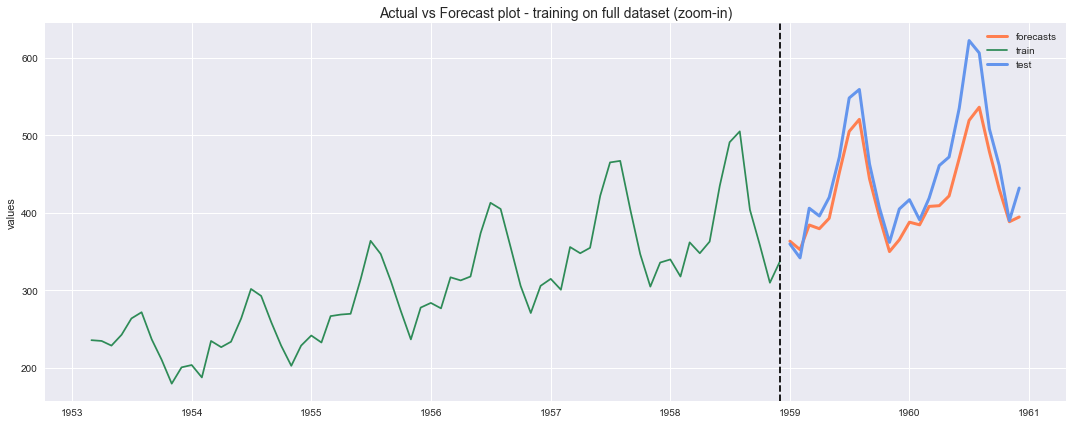

In [45]:
us.plot_forecasts(
    passengers[50:-fh],
    tgt_preds_log[tgt_preds_log > 0].fillna(0),
    passengers.index[50:], 
    y_test=passengers[-fh:],
    title='Actual vs Forecast plot - training on full dataset (zoom-in)'
)

##### Check

In [46]:
# no cross-val.
fasts_log = es.FASTSRegressor(
    lasso_alpha=0.01,
    quantile_reg=True,
    )

In [47]:
%time fasts_log.fit(X_train_log, y_train_log)

X cols 18
X_sel_ cols 2
with quantile regression.
self.gbr_fitted_.n_features = 2
Wall time: 138 ms


FASTSRegressor(lasso_alpha=0.01, loss='quantile', quantile_reg=True)

In [48]:
tgt_preds_log_1 = fasts_log.predict(fh, pred_int=True)
tgt_preds_log_1


=== Trying to make forecasts w FASTSRegressor...



test windows:
[5.823045895483019, 5.739792912179234, 5.886104031450156, 6.003887067106539, 6.226536669287466, 6.198478716492308, 6.077642243349034, 5.8971538676367405, 5.855071922202427, 5.8944028342648505, 5.765191102784844, 5.831882477283517, 5.820082930352362, 5.723585101952381, 5.8522024797744745, 6.003887067106539, 6.148468295917647, 6.144185634125646]
length of first Lasso test window: 18
[-0.04149772490504855, -0.06395937637882465]
length of first GradBoost test window (residuals): 2

... gonna predict quantiles as well.

length of first vanilla GradBoost test window before quant. reg: 18
[-0.04149772490504855, -0.06395937637882465]
length of first GradBoost quantile test window (0.95): 2


You're here: 'lasso' loop...

You're here: 'grad_boost' loop...

You're here: 'grad_boost_qtl' loop...



y_pred    low_80     up_80    low_95     up_95
0   5.880582  5.447521  6.313642  5.217457  6.543706
1   5.834860  5.418651  6.251069  5.197540  6.472179
2   5.929037  5.477047  6.381027  5.236927  6.621147
3   5.907198  5.473749  6.340648  5.243478  6.570918
4   5.937279  5.519664  6.354895  5.297805  6.576753
5   6.076822  5.639062  6.514582  5.406502  6.747142
6   6.180404  5.753824  6.606984  5.527203  6.833605
7   6.210511  5.784112  6.636909  5.557587  6.863434
8   6.044089  5.588506  6.499672  5.346478  6.741700
9   5.940538  5.513905  6.367171  5.287257  6.593820
10  5.820684  5.398830  6.242538  5.174720  6.466648
11  5.873674  5.433517  6.313831  5.199683  6.547665
12  5.921849  5.474100  6.369599  5.236232  6.607466
13  5.891247  5.475160  6.307333  5.254114  6.528379
14  5.960120  5.530896  6.389345  5.302870  6.617371
15  5.949405  5.533813  6.364996  5.313030  6.585779
16  5.971323  5.529927  6.412719  5.295436  6.647211
17  6.079096  5.643282  6.514910  5.411756  6.746436
18  6.166879  5.743670  6.590088  5.518841  6.814918
19  6.197197  5.780862  6.613532  5.559683  6.834710
20  6.073468  5.647194  6.499743  5.420735  6.726201
21  5.984351  5.551118  6.417585  5.320962  6.647740
22  5.885805  5.448125  6.323485  5.215607  6.556003
23  5.917639  5.505725  6.329552  5.286896  6.548381

In [49]:
tgt_preds_1 = np.expm1(tgt_preds_log_1)
tgt_preds_1

y_pred      low_80       up_80      low_95       up_95
0   357.017380  231.181851  551.051952  183.464577  693.856685
1   341.016815  224.574682  517.566624  179.826944  645.891989
2   374.792534  238.139523  589.534040  187.091292  749.805777
3   366.674616  237.352017  566.163748  188.327532  713.025172
4   377.902579  248.551061  574.301758  198.897607  717.203514
5   434.642600  280.198878  673.911921  221.850727  850.621520
6   482.187033  314.394306  739.247064  250.439623  927.531892
7   496.955468  324.093167  761.734112  258.196749  955.646441
8   420.613513  266.335960  663.923471  208.867782  845.999727
9   379.139488  247.118225  581.407963  196.800038  729.566239
10  336.202703  220.147561  513.161958  175.747154  642.323869
11  354.552878  227.953010  551.156310  180.214838  696.613124
12  372.101071  237.435662  582.823778  186.960608  739.604163
13  360.856124  237.688646  547.580157  190.351853  683.288408
14  386.656786  251.369850  594.466471  199.912611  746.975862
15  382.524957  252.107205  580.142651  201.964304  723.715576
16  391.024089  251.125552  608.549033  198.424458  769.632089
17  435.634294  281.388070  674.133009  223.024677  850.020116
18  475.696042  311.208195  726.844817  248.345774  910.341361
19  490.369758  323.038250  744.110304  258.740592  928.559132
20  433.183930  282.494785  663.970556  225.045293  832.973060
21  396.164748  256.525183  611.521986  203.580621  770.039974
22  358.892377  231.322095  556.512718  183.123568  702.454338
23  370.533407  245.096896  559.905378  196.728787  697.113180

In [50]:
us.mean_absolute_percentage_error(
    passengers.values[-fh:],
    tgt_preds_1[tgt_preds_1 > 0].fillna(0)["y_pred"])

11.057641084559672

Default model with different `alpha` does a poorer job on test data.


full_time_series_df
            orig_scale_posts   forecasts  y_test        mean  naive  \
Month                                                                 
1960-08-01               NaN  490.369758   606.0  252.893418  337.0   
1960-09-01               NaN  433.183930   508.0  252.893418  337.0   
1960-10-01               NaN  396.164748   461.0  252.893418  337.0   
1960-11-01               NaN  358.892377   390.0  252.893418  337.0   
1960-12-01               NaN  370.533407   432.0  252.893418  337.0   

                 drift  snaive      low_80       up_80      low_95       up_95  
Month                                                                           
1960-08-01  382.753339   505.0  323.038250  744.110304  258.740592  928.559132  
1960-09-01  386.610124   404.0  282.494785  663.970556  225.045293  832.973060  
1960-10-01  386.610124   359.0  256.525183  611.521986  203.580621  770.039974  
1960-11-01  390.505671   310.0  231.322095  556.512718  183.123568  702.4543

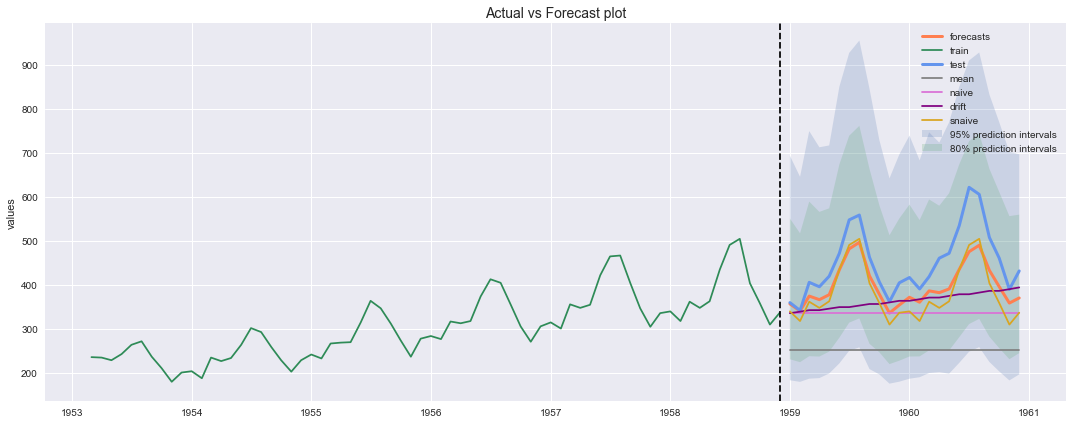

In [51]:
# 'spreds_log' from previous run
us.plot_forecasts(
    passengers[50:-fh],
    tgt_preds_1[tgt_preds_1 > 0].fillna(0),
    passengers.index[50:], 
    y_test=passengers[-fh:],
    simple_preds=spreds_log,
    return_pred_int=True)

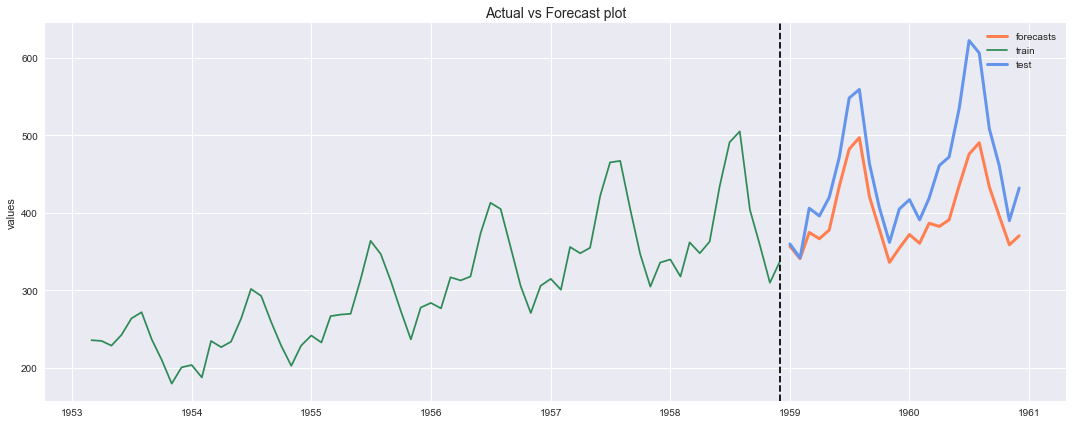

In [52]:
us.plot_forecasts(
    passengers[50:-fh],
    tgt_preds_1[tgt_preds_1 > 0].fillna(0),
    passengers.index[50:], 
    y_test=passengers[-fh:])

Despite overperforming baselines, model trained on log data heavily **underestimates** future nr of passengers, following a negative trend!

In [53]:
print("=== Fit best model upon full X_log, y_log (using best parameters from rdn search)...")

t0 = time()
best_fasts_log.fit(X_log, y_log)
t1 = time()

=== Fit best model upon full X_log, y_log (using best parameters from rdn search)...
X cols 18
X_sel_ cols 3
with quantile regression.
self.gbr_fitted_.n_features = 3


In [54]:
print(f"Time of fitting: {(t1 - t0):.2f} s")
print()
print("=== Compare best estimator baselines...")

_, spreds_full_log, tgt_fcs_full_log = best_fasts_log.compare_to_baselines(
    y_log, season=12, fh=fh, bck_transformer=np.expm1)

Time of fitting: 0.54 s

=== Compare best estimator baselines...

FASTSRegressor with quantile regression performed.

=== Trying to make forecasts w FASTSRegressor...



test windows:
[6.07073772800249, 5.968707559985366, 6.135564891081739, 6.2324480165505225, 6.408528791059498, 6.434546518787453, 6.284134161070802, 6.159095388491933, 6.135564891081739, 6.040254711277414, 5.971261839790462, 6.035481432524756, 6.0063531596017325, 5.8944028342648505, 6.0112671744041615, 6.139884552226255, 6.327936783729195, 6.3080984415095305]
length of first Lasso test window: 18
[-0.004581543345075545, -0.051451990026393446, 0.020253188822414003]
length of first GradBoost test window (residuals): 3

... gonna predict quantiles as well.

length of first vanilla GradBoost test window before quant. reg: 18
[-0.004581543345075545, -0.051451990026393446, 0.020253188822414003]
length of first GradBoost quantile test window (0.95): 3


You're here: 'lasso' loop...

You're here: 'grad_boost' loop...

You're he

=== Plot forecasts against simple preds...

full_time_series_df
            orig_scale_posts   forecasts        mean  naive       drift  \
1949-06-13               NaN  667.284171  281.830097  432.0  496.701251   
1949-06-14               NaN  603.117505  281.830097  432.0  501.703232   
1949-06-15               NaN  547.805819  281.830097  432.0  506.755483   
1949-06-16               NaN  491.034223  281.830097  432.0  506.755483   
1949-06-17               NaN  502.501523  281.830097  432.0  511.858511   

            snaive      low_80       up_80      low_95       up_95  
1949-06-13   606.0  517.948866  859.592947  452.705317  983.347586  
1949-06-14   508.0  482.935001  753.146650  429.139564  847.464057  
1949-06-15   461.0  434.306159  690.898842  383.891541  781.526491  
1949-06-16   390.0  398.837736  604.489814  357.106356  675.049650  
1949-06-17   432.0  396.581730  636.639420  349.698401  721.882634  


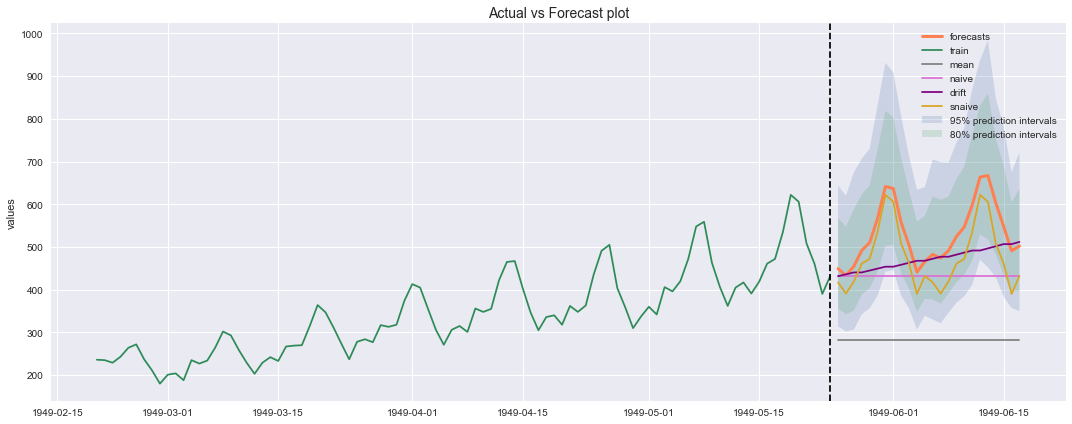

In [55]:
print("=== Plot forecasts against simple preds...")

us.plot_forecasts(
    passengers[50:], 
    tgt_fcs_full_log[tgt_fcs_full_log > 0].fillna(0),
    full_series_index[50:], 
    simple_preds=spreds_full_log,
    return_pred_int=True
)

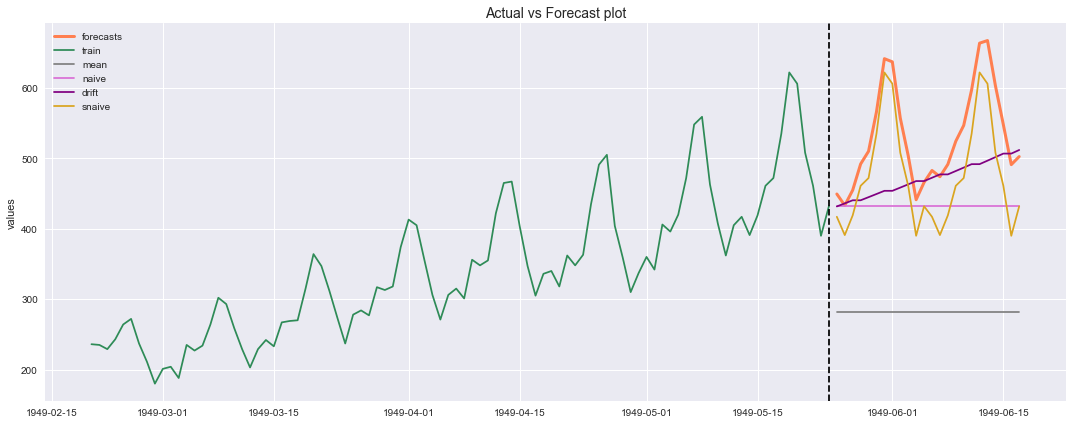

In [56]:
us.plot_forecasts(
    passengers[50:], 
    tgt_fcs_full_log[tgt_fcs_full_log > 0].fillna(0),
    full_series_index[50:], 
    simple_preds=spreds_full_log
)

Forecasts look more likely, though variance is not increasing.

### MinMax scaling

In [57]:
passengers_y_scale = scaler.fit_transform(passengers.values.reshape(-1, 1)).ravel()
passengers_y_scale[:10]

array([1.13899614, 1.24324324, 1.48648649, 1.43436293, 1.2953668 ,
       1.53861004, 1.76447876, 1.76447876, 1.55598456, 1.26061776])

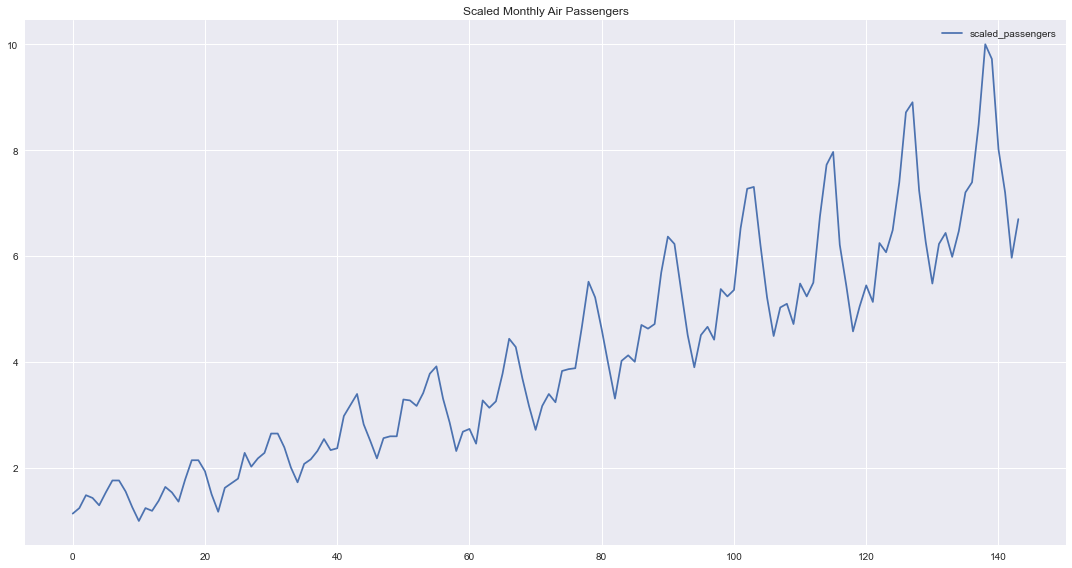

In [58]:
plt.figure(figsize=(15, 8))
plt.plot(passengers_y_scale, label="scaled_passengers")
plt.title("Scaled Monthly Air Passengers")
plt.legend()    
plt.tight_layout()

Increasing variance should not be a problem even when relying on scaled data.

In [59]:
X_sc, y_sc = us.embed_to_X_y(
    pd.Series(passengers_y_scale), 
    n_lags=n_lags, name='sscaled_passengers')

In [60]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(
    X_sc, y_sc, test_size=test_size, random_state=42, shuffle=False)

In [61]:
display(X_train_sc)

lag_1     lag_2     lag_3     lag_4     lag_5     lag_6     lag_7  \
0    1.781853  1.364865  1.538610  1.642857  1.382239  1.191120  1.243243   
1    2.146718  1.781853  1.364865  1.538610  1.642857  1.382239  1.191120   
2    2.146718  2.146718  1.781853  1.364865  1.538610  1.642857  1.382239   
3    1.938224  2.146718  2.146718  1.781853  1.364865  1.538610  1.642857   
4    1.503861  1.938224  2.146718  2.146718  1.781853  1.364865  1.538610   
..        ...       ...       ...       ...       ...       ...       ...   
97   7.723938  6.750965  5.500000  5.239382  5.482625  4.718147  5.100386   
98   7.967181  7.723938  6.750965  5.500000  5.239382  5.482625  4.718147   
99   6.212355  7.967181  7.723938  6.750965  5.500000  5.239382  5.482625   
100  5.430502  6.212355  7.967181  7.723938  6.750965  5.500000  5.239382   
101  4.579151  5.430502  6.212355  7.967181  7.723938  6.750965  5.500000   

        lag_8     lag_9    lag_10    lag_11    lag_12    lag_13    lag_14  \
0    1.000000  1.260618  1.555985  1.764479  1.764479  1.538610  1.295367   
1    1.243243  1.000000  1.260618  1.555985  1.764479  1.764479  1.538610   
2    1.191120  1.243243  1.000000  1.260618  1.555985  1.764479  1.764479   
3    1.382239  1.191120  1.243243  1.000000  1.260618  1.555985  1.764479   
4    1.642857  1.382239  1.191120  1.243243  1.000000  1.260618  1.555985   
..        ...       ...       ...       ...       ...       ...       ...   
97   5.030888  4.492278  5.222008  6.212355  7.306950  7.272201  6.525097   
98   5.100386  5.030888  4.492278  5.222008  6.212355  7.306950  7.272201   
99   4.718147  5.100386  5.030888  4.492278  5.222008  6.212355  7.306950   
100  5.482625  4.718147  5.100386  5.030888  4.492278  5.222008  6.212355   
101  5.239382  5.482625  4.718147  5.100386  5.030888  4.492278  5.222008   

       lag_15    lag_16    lag_17    lag_18  
0    1.434363  1.486486  1.243243  1.138996  
1    1.295367  1.434363  1.486486  1.243243  
2    1.538610  1.295367  1.434363  1.486486  
3    1.764479  1.538610  1.295367  1.434363  
4    1.764479  1.764479  1.538610  1.295367  
..        ...       ...       ...       ...  
97   5.361004  5.239382  5.378378  4.422780  
98   6.525097  5.361004  5.239382  5.378378  
99   7.272201  6.525097  5.361004  5.239382  
100  7.306950  7.272201  6.525097  5.361004  
101  6.212355  7.306950  7.272201  6.525097  

[102 rows x 18 columns]

In [62]:
fasts_sc = es.FASTSRegressor(
    quantile_reg=True,
    )

print("=== TS Randomized Search CV...")
print()

rscv_sc = vd.TSRandomizedSearchCV(
    estimator=fasts_sc, n_split=3, param_distro=fasts_params, fh=fh, 
    test_size=test_size, n_iter=n_iter, 
    n_jobs=n_jobs
)

t0 = time()
rscv_sc.fit(X_train_sc, y_train_sc)
t1 = time()

=== TS Randomized Search CV...

Best validation rmse score overall: 0.511 ± 0.192
Refitting best estimator...
X cols 18
X_sel_ cols 13
with quantile regression.
self.gbr_fitted_.n_features = 13


Full time of Search: 23.84 s

=== Compare best estimator to baselines on test data...

FASTSRegressor with quantile regression performed.

=== Trying to make forecasts w FASTSRegressor...



test windows:
[5.0482625482625485, 4.579150579150579, 5.43050193050193, 6.212355212355212, 7.967181467181468, 7.723938223938224, 6.750965250965251, 5.5, 5.239382239382239, 5.482625482625482, 4.718146718146718, 5.100386100386101, 5.030888030888031, 4.492277992277993, 5.222007722007722, 6.212355212355212, 7.306949806949807, 7.2722007722007715]
length of first Lasso test window: 18
[-0.06623312326225683, -0.03229534337075446, 0.15913346433479614, -0.45468434505817523, 0.17216729522285146, 0.01650823482104702, -0.12075507495642235, -0.07818655840008937, -0.2223804646403078, -0.16293292340029186, -0.11317776132573876, -0.07522505919801414, 0.0008460496607956003]
length of first GradBoost test window (residuals): 13

... gonna predict quantiles as well.

length of first vanilla GradBoost test window befo

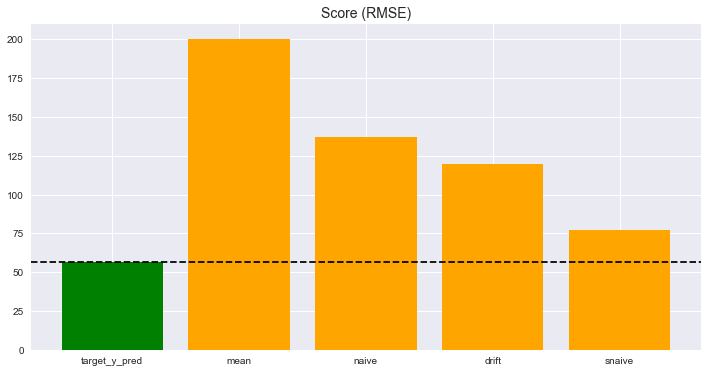

In [63]:
print(f"Full time of Search: {(t1 - t0):.2f} s")
print()

best_fasts_sc = rscv_sc.best_params_['best_estimator']

print("=== Compare best estimator to baselines on test data...")

scores_sc, spreds_sc, tgt_preds_sc = best_fasts_sc.compare_to_baselines(
    y_train_sc, 
    y_test_sc, 
    season=12,
    fh=fh, 
    bar_plot=True,
    bck_transformer=scaler
)

In [64]:
us.mean_absolute_percentage_error(
    passengers.values[-fh:],
    tgt_preds_sc[tgt_preds_sc > 0].fillna(0)["y_pred"])

11.574818099617247


full_time_series_df
            orig_scale_posts   forecasts  y_test        mean  naive  \
Month                                                                 
1960-08-01               NaN  571.410156   606.0  266.647059  337.0   
1960-09-01               NaN  455.844862   508.0  266.647059  337.0   
1960-10-01               NaN  384.498565   461.0  266.647059  337.0   
1960-11-01               NaN  337.768032   390.0  266.647059  337.0   
1960-12-01               NaN  355.784789   432.0  266.647059  337.0   

                 drift  snaive      low_80       up_80      low_95       up_95  
Month                                                                           
1960-08-01  368.180000   505.0  498.506784  644.313528  459.776868  683.043445  
1960-09-01  369.906667   404.0  379.009912  532.679812  338.191345  573.498379  
1960-10-01  371.633333   359.0  306.210990  462.786140  264.620716  504.376414  
1960-11-01  373.360000   310.0  264.209297  411.326768  225.131219  450.4048

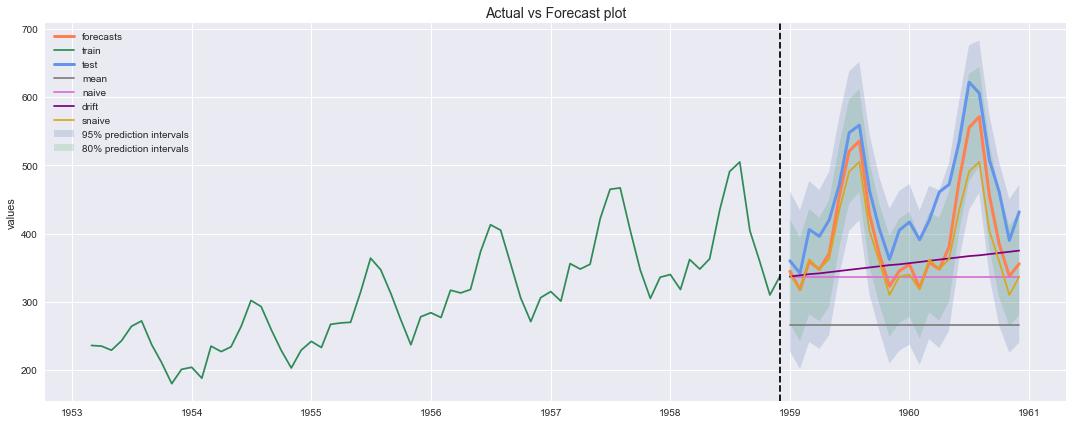

In [65]:
us.plot_forecasts(
    passengers[50:-fh],
    tgt_preds_sc[tgt_preds_sc > 0].fillna(0),
    passengers.index[50:], 
    y_test=passengers[-fh:],
    simple_preds=spreds_sc,
    return_pred_int=True)

Good. Prediction intervals **cover** test forecasts decently.

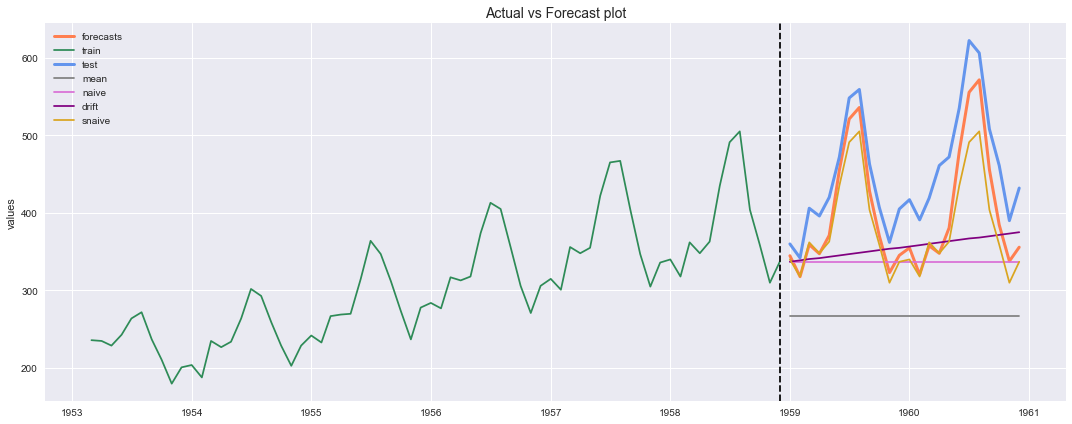

In [66]:
us.plot_forecasts(
    passengers[50:-fh],
    tgt_preds_sc[tgt_preds_sc > 0].fillna(0),
    passengers.index[50:], 
    y_test=passengers[-fh:],
    simple_preds=spreds_sc)

Again, model **underestimates** future nr of passengers :|

In [67]:
print("=== Fit best model upon full X_sc, y_sc (using best parameters from rdn search)...")

t0 = time()
best_fasts_sc.fit(X_sc, y_sc)
t1 = time()

=== Fit best model upon full X_sc, y_sc (using best parameters from rdn search)...
X cols 18
X_sel_ cols 14
with quantile regression.
self.gbr_fitted_.n_features = 14


In [68]:
print(f"Time of fitting: {(t1 - t0):.2f} s")
print()
print("=== Compare best estimator baselines...")

_, spreds_full_sc, tgt_fcs_full_sc = best_fasts_sc.compare_to_baselines(
    y_sc, season=12, fh=fh, bck_transformer=scaler)

Time of fitting: 0.46 s

=== Compare best estimator baselines...

FASTSRegressor with quantile regression performed.

=== Trying to make forecasts w FASTSRegressor...



test windows:
[6.698841698841699, 5.969111969111969, 7.202702702702703, 8.019305019305019, 9.72200772200772, 10.0, 8.48841698841699, 7.393822393822394, 7.202702702702703, 6.472972972972973, 5.986486486486487, 6.438223938223938, 6.22972972972973, 5.482625482625482, 6.264478764478764, 7.237451737451738, 8.905405405405407, 8.714285714285715]
length of first Lasso test window: 18
[-0.08923555257586724, -0.2874330805008274, 0.3431811383408485, -0.12497030111378926, -0.28828343861460937, 0.17521461757223555, 0.06693972710917073, -0.04787685407564446, 0.5017307986976958, -0.4443206449775374, -0.0909880262729299, 0.05221135850423231, 0.3715322136422312, 0.1812523290758259]
length of first GradBoost test window (residuals): 14

... gonna predict quantiles as well.

length of first vanilla GradBoost test window before quant. reg

=== Plot forecasts against simple preds...

full_time_series_df
            orig_scale_posts   forecasts   mean  naive       drift  snaive  \
1949-06-13               NaN  716.540767  302.0  432.0  471.780000   606.0   
1949-06-14               NaN  610.653632  302.0  432.0  474.082222   508.0   
1949-06-15               NaN  538.461091  302.0  432.0  475.808889   461.0   
1949-06-16               NaN  467.719745  302.0  432.0  478.111111   390.0   
1949-06-17               NaN  495.587642  302.0  432.0  480.413333   432.0   

                low_80       up_80      low_95       up_95  
1949-06-13  668.181968  764.899567  642.491355  790.590179  
1949-06-14  559.780263  661.527000  532.753786  688.553477  
1949-06-15  489.082013  587.840170  462.849377  614.072805  
1949-06-16  421.705435  513.734055  397.260333  538.179158  
1949-06-17  445.224470  545.950814  418.469035  572.706249  


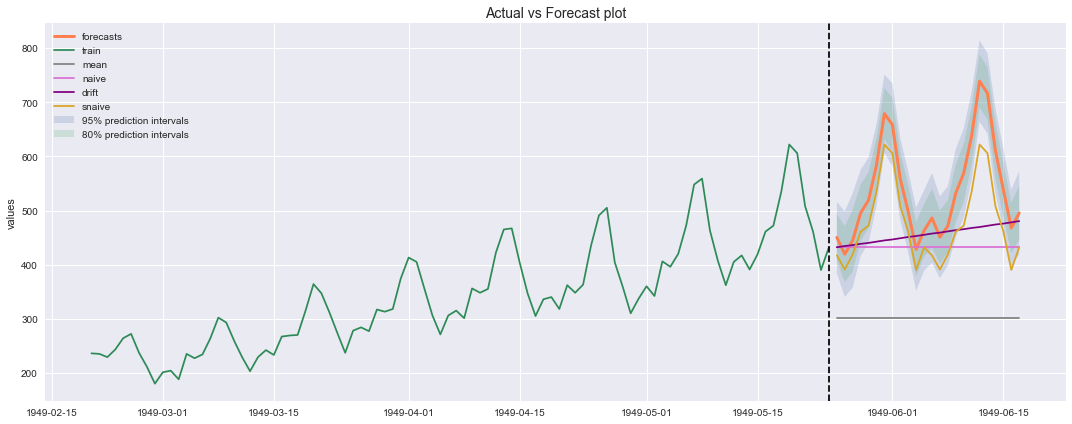

In [69]:
print("=== Plot forecasts against simple preds...")

us.plot_forecasts(
    passengers[50:], 
    tgt_fcs_full_sc[tgt_fcs_full_sc > 0].fillna(0),
    full_series_index[50:], 
    simple_preds=spreds_full_sc,
    return_pred_int=True
)

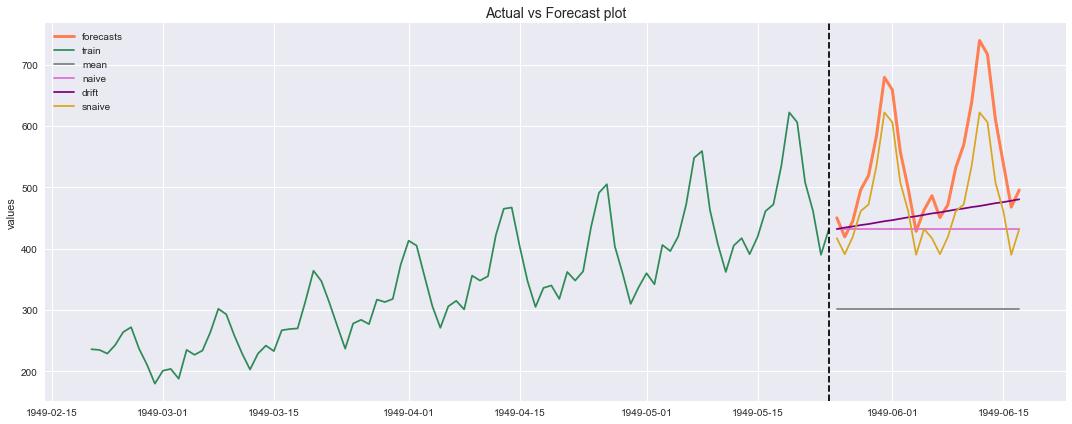

In [70]:
us.plot_forecasts(
    passengers[50:], 
    tgt_fcs_full_sc[tgt_fcs_full_sc > 0].fillna(0),
    full_series_index[50:], 
    simple_preds=spreds_full_sc,
)

At least, cyclical patterns are **matched** at every transformation / modelling.